# APPENDIX Explaining market value of players using LIME method and comparing it with SHAP

I am going to explain market predictions for two players Messi and Courtois. I still use fifa-23 dataset, but this time I base my prediction on one more variable - 'Club Position' to get better results. Models that I use are Random Forest Regressor and MLP Regressor.

First model that I use is RandomForestRegressor. I have already used and shortly described in homework 1.

Example predictions:
L. Messi: 770525.1833572639
T. Courtois: 1188085.347038738
Coefficient of determination: 0.80
Scatter plot: predictions vs truth


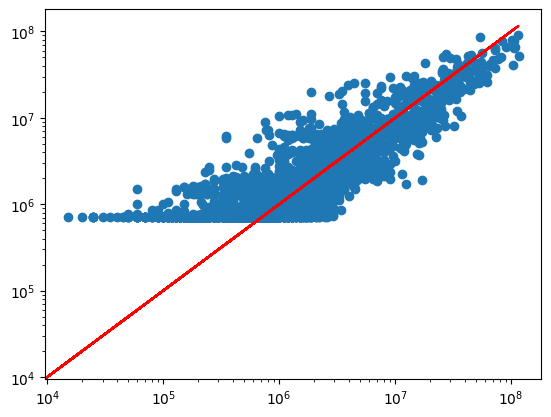

Permutation explainer: 101it [00:20,  2.93it/s]                         


SHAP Decomposition for observation L. Messi


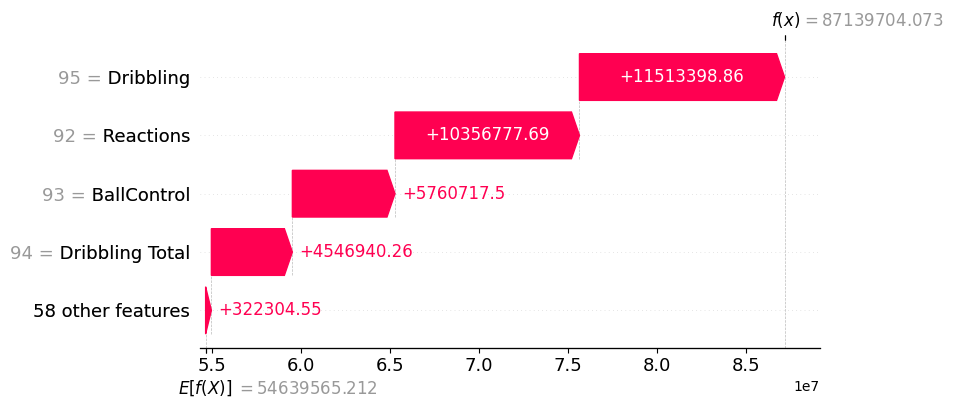

SHAP Decomposition for observation T. Courtois


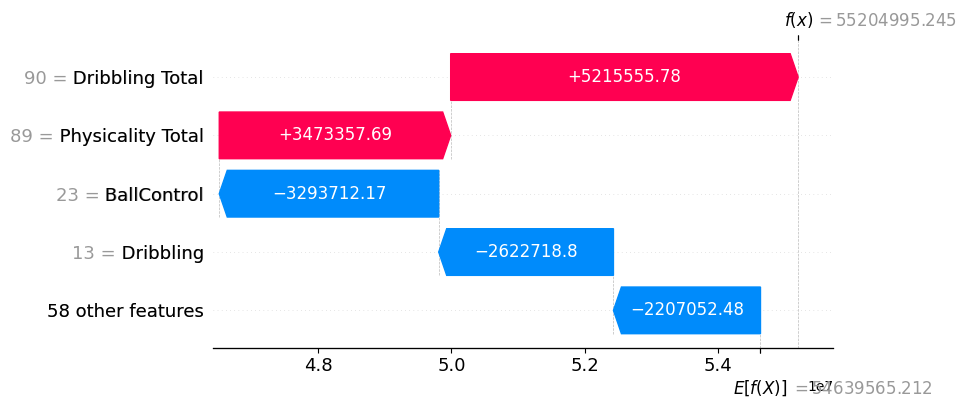

LIME Decomposition for observation L. Messi


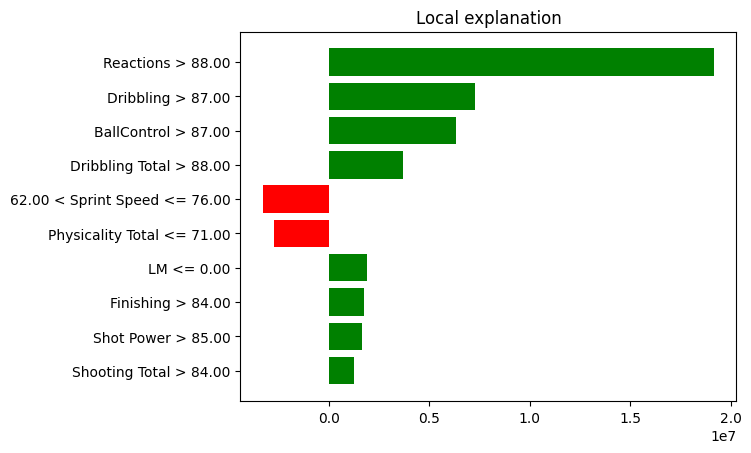

LIME Decomposition for observation T. Courtois


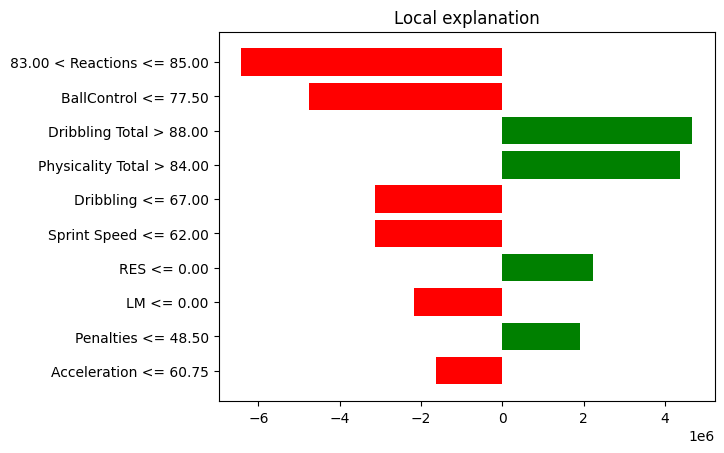

In [9]:
p1()

MLP - multi-layer perceptron is a neural network that consists of at least 3 layers. One layer usually consist of a linear and an activation.

Coefficient of determination: 0.37


Permutation explainer: 101it [00:48,  1.71it/s]                         


Scatter plot: predictions vs truth


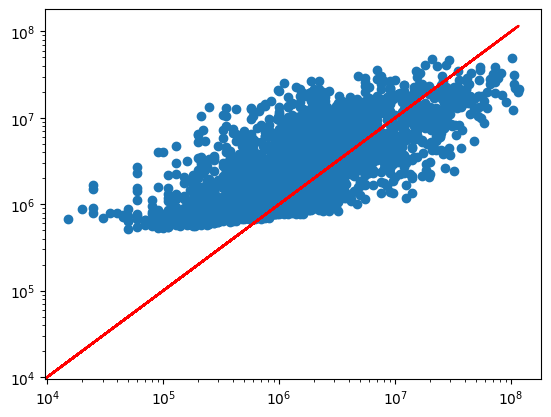

SHAP Decomposition for observation L. Messi


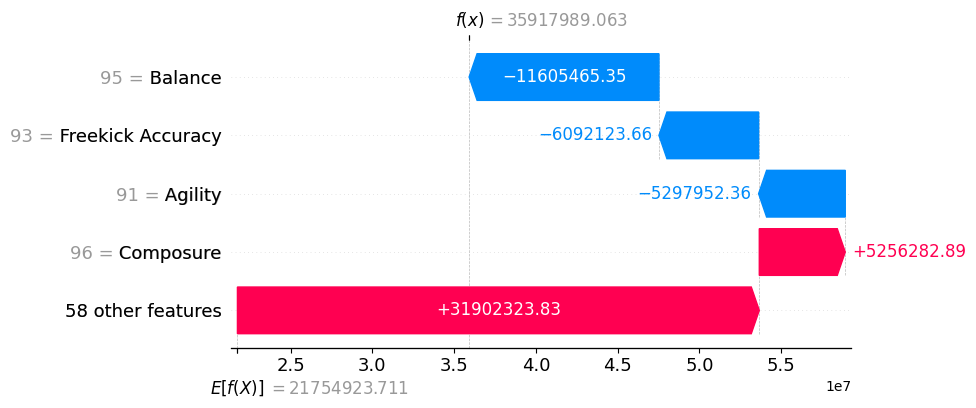

SHAP Decomposition for observation T. Courtois


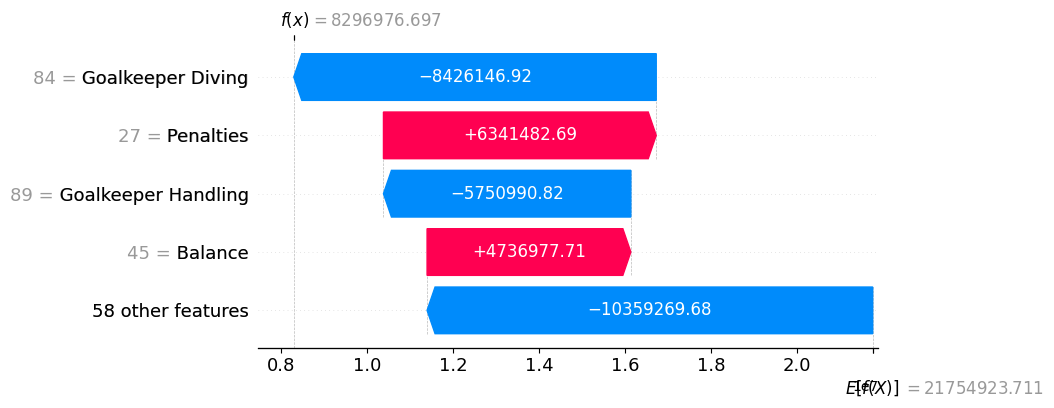

LIME Decomposition for observation L. Messi


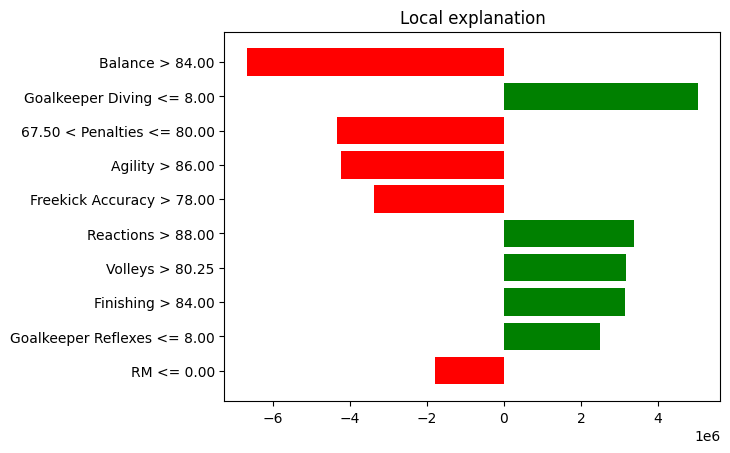

LIME Decomposition for observation T. Courtois


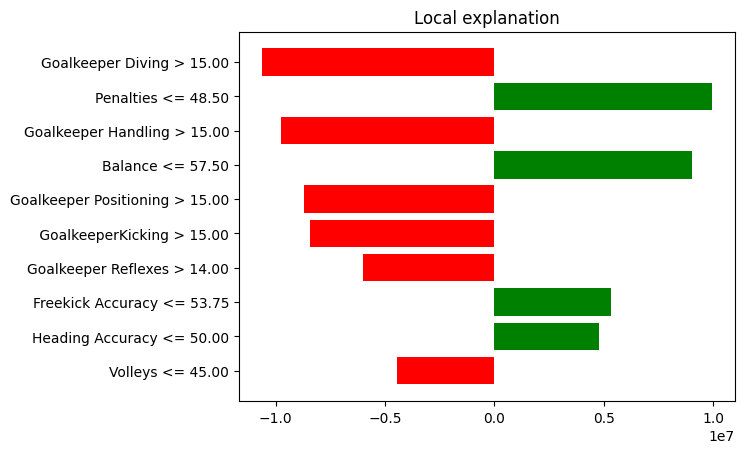

In [10]:
p2()

LIME Decomposition for observation T. Courtois


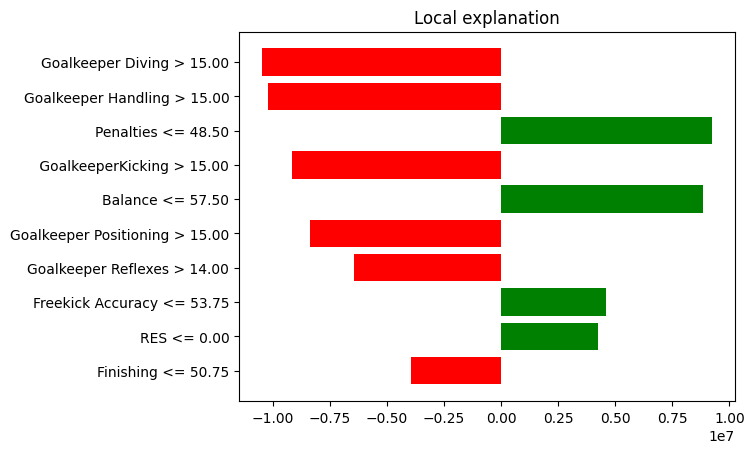

LIME Decomposition for observation T. Courtois


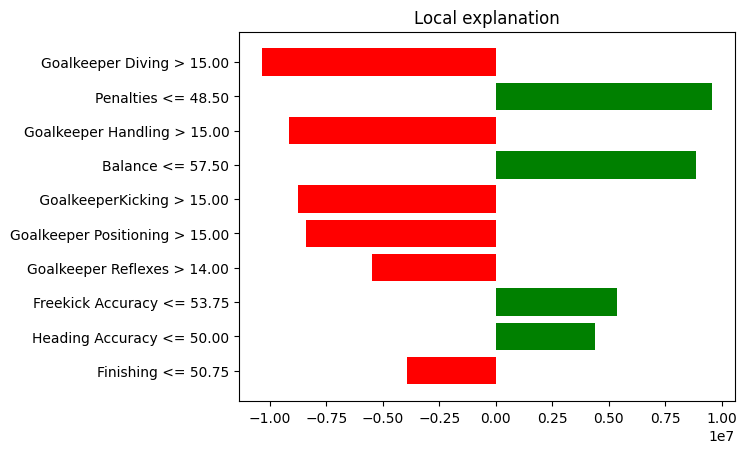

LIME Decomposition for observation T. Courtois


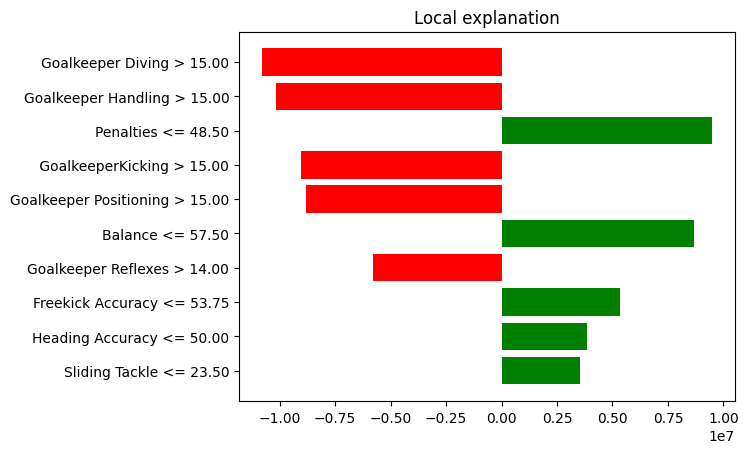

In [11]:
p3()

### 4.
It is not perfectly stable, but explanations does not differ very much.
### 5.
They are similar.
### 6.
MLP claims that Goalkeeper Diving is the most important variable for Courtois but other model do not.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import dalex as dx
import warnings
warnings.filterwarnings("ignore")


def read_dataset():
    return pd.read_csv("archive/fifa.csv")

def plot_feature_performance(X, y, y_pred, i):
    plt.scatter(X.iloc[:, i], y, color="green")
    plt.plot(X.iloc[:, i], y_pred, color="blue", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()


def plot_bars(height, labels, num):
    arr = np.vstack([labels, height])
    ind = np.lexsort(arr)[::-1][:num]
    plt.bar(np.arange(num), arr[1, ind])
    plt.xticks(np.arange(num), arr[0, ind], rotation=-60, fontsize=10)
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


df = read_dataset()
y = df["Value(in Euro)"]

idx_1, idx_2 = 0, 6
name_1, name_2 = df["Known As"].iloc[idx_1],  df["Known As"].iloc[idx_2]

df = df[['Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'Club Position']]

scale_mapper = {"Low":1, "Medium":2, "High":3}
df["Attacking Work Rate"].replace(scale_mapper, inplace=True)
df["Defensive Work Rate"].replace(scale_mapper, inplace=True)

one_hot = pd.get_dummies(df['Club Position'])
df = df.drop('Club Position',axis = 1)
df = df.join(one_hot)

X100 = df.iloc[:100].copy()
y100 = y.iloc[:100]
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [6]:
def p1():
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    print("Example predictions:")
    print("{}: {}".format(name_1, y_pred[idx_1]))
    print("{}: {}".format(name_2, y_pred[idx_2]))

    print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

    print("Scatter plot: predictions vs truth")
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='r')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

    explainer = shap.Explainer(regr.predict, X100)
    shap_values = explainer(X100)

    print('SHAP Decomposition for observation ' + name_1)
    shap.plots.waterfall(shap_values[idx_1], max_display=5)

    print('SHAP Decomposition for observation ' + name_2)
    shap.plots.waterfall(shap_values[idx_2], max_display=5)

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)

    print('LIME Decomposition for observation ' + name_1)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_1]]).plot()
    plt.show()

    print('LIME Decomposition for observation ' + name_2)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_2]]).plot()
    plt.show()

In [7]:
def p2():
    regr = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True,
                        hidden_layer_sizes=(64, 128, 128, 64), learning_rate_init=0.001,
                        learning_rate='invscaling')
    regr.fit(X_train.values, y_train)
    y_pred = regr.predict(X_test.values)


    print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))
    explainer = shap.Explainer(regr.predict, X100)
    shap_values = explainer(X100)

    print("Scatter plot: predictions vs truth")
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='r')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

    print('SHAP Decomposition for observation ' + name_1)
    shap.plots.waterfall(shap_values[idx_1], max_display=5)

    print('SHAP Decomposition for observation ' + name_2)
    shap.plots.waterfall(shap_values[idx_2], max_display=5)

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)

    print('LIME Decomposition for observation ' + name_1)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_1]]).plot()
    plt.show()

    print('LIME Decomposition for observation ' + name_2)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_2]]).plot()
    plt.show()

In [8]:
def p3():
    regr = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True,
                        hidden_layer_sizes=(64, 128, 128, 64), learning_rate_init=0.001,
                        learning_rate='invscaling')
    regr.fit(X_train.values, y_train)

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)
    print('LIME Decomposition for observation ' + name_2)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_2]]).plot()
    plt.show()

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)
    print('LIME Decomposition for observation ' + name_2)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_2]]).plot()
    plt.show()

    dalex_explainer = dx.Explainer(regr, X100, y100, verbose=False)
    print('LIME Decomposition for observation ' + name_2)
    dalex_explainer.predict_surrogate(X100.iloc[[idx_2]]).plot()
    plt.show()